In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import lib

In [2]:
import re
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Crawl data from website

In [ ]:
import requests
from bs4 import BeautifulSoup

list_url = ['https://openaccess.thecvf.com/ICCV2019?day=2019-10-29',
            'https://openaccess.thecvf.com/ICCV2019?day=2019-10-30',
            'https://openaccess.thecvf.com/ICCV2019?day=2019-10-31',
            'https://openaccess.thecvf.com/ICCV2019?day=2019-11-01']

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/NLP/Week1/title.txt",'w',encoding = 'utf-8') as f:
  for url in list_url:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    titles = soup.findAll('dt', class_='ptitle')
    for title in titles:
      f.write(title.text + "\n")

# Preprocessing data

In [3]:
data = "/content/drive/MyDrive/Colab Notebooks/NLP/Week1/title.txt"

stop_words = stopwords.words('english')

white_space_tokenizer = WhitespaceTokenizer()

In [4]:
with open(data, "r") as f:
  content = f.read()
  paper_names_tokenized = content.translate(str.maketrans('', '', string.punctuation.replace('-', '')))
  paper_names_tokenized = white_space_tokenizer.tokenize(paper_names_tokenized.lower())
  paper_names_tokenized = [word for word in paper_names_tokenized if word not in stop_words]

print(paper_names_tokenized)

['faceforensics', 'learning', 'detect', 'manipulated', 'facial', 'images', 'deepvcp', 'end-to-end', 'deep', 'neural', 'network', 'point', 'cloud', 'registration', 'shape', 'reconstruction', 'using', 'differentiable', 'projections', 'deep', 'priors', 'fine-grained', 'segmentation', 'networks', 'self-supervised', 'segmentation', 'improved', 'long-term', 'visual', 'localization', 'sanet', 'scene', 'agnostic', 'network', 'camera', 'localization', 'total', 'denoising', 'unsupervised', 'learning', '3d', 'point', 'cloud', 'cleaning', 'hierarchical', 'self-attention', 'network', 'action', 'localization', 'videos', 'goal-driven', 'sequential', 'data', 'abstraction', 'jointly', 'aligning', 'millions', 'images', 'deep', 'penalised', 'reconstruction', 'congealing', 'drop', 'adapt', 'learning', 'discriminative', 'features', 'unsupervised', 'domain', 'adaptation', 'nlnl', 'negative', 'learning', 'noisy', 'labels', 'adversarial', 'robustness', 'vs', 'model', 'compression', 'design', 'black-box', 'adv

In [5]:
count = {word:paper_names_tokenized.count(word) for word in paper_names_tokenized}
print(count)

sort_token = []
sort_value = []

for i in sorted(count, key=count.get, reverse=True):
    sort_token.append(i)
    sort_value.append(count[i])

{'faceforensics': 1, 'learning': 217, 'detect': 3, 'manipulated': 1, 'facial': 13, 'images': 35, 'deepvcp': 1, 'end-to-end': 15, 'deep': 100, 'neural': 59, 'network': 102, 'point': 38, 'cloud': 17, 'registration': 8, 'shape': 26, 'reconstruction': 23, 'using': 41, 'differentiable': 11, 'projections': 1, 'priors': 7, 'fine-grained': 14, 'segmentation': 73, 'networks': 89, 'self-supervised': 13, 'improved': 5, 'long-term': 3, 'visual': 48, 'localization': 24, 'sanet': 1, 'scene': 30, 'agnostic': 2, 'camera': 15, 'total': 1, 'denoising': 6, 'unsupervised': 44, '3d': 91, 'cleaning': 1, 'hierarchical': 9, 'self-attention': 1, 'action': 32, 'videos': 14, 'goal-driven': 1, 'sequential': 8, 'data': 25, 'abstraction': 1, 'jointly': 4, 'aligning': 3, 'millions': 1, 'penalised': 1, 'congealing': 1, 'drop': 2, 'adapt': 1, 'discriminative': 9, 'features': 12, 'domain': 33, 'adaptation': 26, 'nlnl': 1, 'negative': 1, 'noisy': 5, 'labels': 6, 'adversarial': 58, 'robustness': 4, 'vs': 2, 'model': 25, 

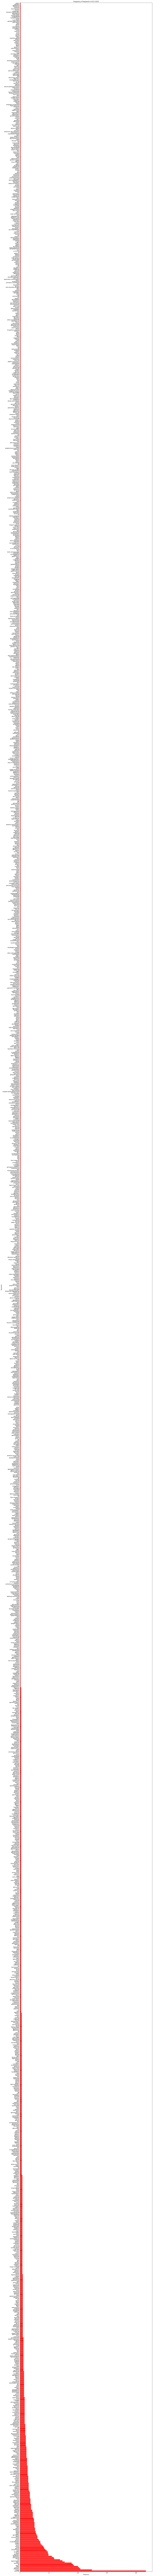

In [6]:
plt.figure(figsize=(20, 400))
plt.margins(y=0)
plt.barh(sort_token, sort_value, color='red')
plt.title("Frequency of keyword in ICCV 2019")
plt.xlabel("Frequency")
plt.ylabel("Keywords")
plt.savefig("/content/drive/MyDrive/Colab Notebooks/NLP/Week1/plots.pdf")
plt.show()